# Choosing a regression algorithm

For the prediction of insulin delivery (Y-shID), three regression algorithms were tested: Linear Regression, Polynomial Regression and Elastic Net algorithm.<br>  

The preparation of the data included converting it to dummy variables, scaling the data, and clustering using the previously chosen and tuned Agglomerative clustering algorithm. Then four clusters were randomly picked for testing: 1 - containing more than 8 rows, 2 - containing 8 rows, 3 - containing 5 rows and 4 - containing 3 rows. The four clusters were then transormed into X features and y labels. In the test, only five features were considered: pre-meal glucose (BG1), dietary value (DV), step count (SC), temperature (Temp) and humidity (Humid). The rest of the features were irrelevant as they remain the same throughout each cluster. The predictions were then visualised against the original train and test data.<br>

After evaluating the accuracy and processing time of the three algorithms, two algorithms emerged as the top contenders. These algorithms were then compared in further detail until one was ultimately selected.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#Styles setup
#Colors
background = '#F0F0F0'
red = '#ED462F'
pink = '#F1BBB8'
green = '#4CB866'
blue = '#003D83'
black = '#333333'
grey = '#D0D9DC'
white = 'white'

#Matplotlib styling
plt.rcParams['axes.facecolor'] = grey
plt.rcParams['figure.facecolor'] = background
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['xtick.color'] = background
plt.rcParams['ytick.color'] = background
plt.rcParams['xtick.labelcolor'] = '#8C9496'
plt.rcParams['ytick.labelcolor'] = '#8C9496'
plt.rcParams['legend.labelcolor'] = '#8C9496'
plt.rcParams['legend.frameon'] = False
plt.rcParams['grid.color'] = background
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.axisbelow'] = True

## 1. Preparing data

### Reading

After reading the CSV file, the Date and shID columns were dropped, as the date had no quantitative value and shID was estimated by the patient and thus irrelevant. The values in the Sport column were then converted to strings in order to prepare for further conversion into dummy variables.

In [3]:
df = pd.read_csv('FullData_preprocessed.csv')
df = df.drop(['Date','shID'], axis=1)
df['Sport'] = df['Sport'].astype(str)
df

,Interval,bID,BG1,BG2,DV,SC,Sport,Temp,Humid,Y-shID
0,lunch-dinner,0.0,3.9,5.6,1.216,1473.0,False,-11.600000,54.030000,3.931915
1,dinner-breakfast,0.0,5.6,6.2,1.172,7649.0,False,-12.087879,52.386667,2.638298
2,breakfast-lunch,0.0,4.6,4.9,0.574,38.0,False,-18.900000,71.030000,3.648936
3,lunch-dinner,0.0,4.9,4.4,0.784,2516.0,False,-14.100000,56.385000,3.276596
4,dinner-breakfast,2.0,4.4,5.7,0.868,4627.0,False,-11.857143,54.900714,3.031915
...,...,...,...,...,...,...,...,...,...,...
385,breakfast-lunch,0.0,5.3,4.4,0.769,0.0,False,5.066667,85.370000,2.808511
386,dinner-breakfast,1.0,4.0,6.1,0.812,11.0,False,11.450000,51.975000,3.893617
387,lunch-dinner,0.0,5.0,3.7,0.900,5924.0,False,10.800000,58.256667,2.361702
388,dinner-breakfast,0.0,3.7,4.8,0.366,0.0,False,9.100000,59.300000,3.063830


### Converting to dummies

In [4]:
X = pd.get_dummies(df)
X

,bID,BG1,BG2,DV,SC,Temp,Humid,Y-shID,Interval_breakfast-lunch,Interval_dinner-breakfast,Interval_lunch-dinner,Sport_False,Sport_True
0,0.0,3.9,5.6,1.216,1473.0,-11.600000,54.030000,3.931915,0,0,1,1,0
1,0.0,5.6,6.2,1.172,7649.0,-12.087879,52.386667,2.638298,0,1,0,1,0
2,0.0,4.6,4.9,0.574,38.0,-18.900000,71.030000,3.648936,1,0,0,1,0
3,0.0,4.9,4.4,0.784,2516.0,-14.100000,56.385000,3.276596,0,0,1,1,0
4,2.0,4.4,5.7,0.868,4627.0,-11.857143,54.900714,3.031915,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.0,5.3,4.4,0.769,0.0,5.066667,85.370000,2.808511,1,0,0,1,0
386,1.0,4.0,6.1,0.812,11.0,11.450000,51.975000,3.893617,0,1,0,1,0
387,0.0,5.0,3.7,0.900,5924.0,10.800000,58.256667,2.361702,0,0,1,1,0
388,0.0,3.7,4.8,0.366,0.0,9.100000,59.300000,3.063830,0,1,0,1,0


### Scaling

For normalizing the temperature data, which contained negative values, the MinMaxScaler was used.

In [5]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 

array([[0.        , 0.19607843, 0.40277778, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.52941176, 0.48611111, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.33333333, 0.30555556, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.41176471, 0.13888889, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.15686275, 0.29166667, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.66666667, 0.27777778, ..., 0.        , 1.        ,
        0.        ]])

### Clustering

The data was scaled using previously chosen and tuned Agglomerative Clustering algorithm.

In [6]:
model = AgglomerativeClustering(n_clusters=None,linkage='ward',distance_threshold=0.6)
cluster_labels = model.fit_predict(scaled_X)

In [7]:
scaled_df = pd.DataFrame(scaled_X,columns=X.columns)
scaled_df

,bID,BG1,BG2,DV,SC,Temp,Humid,Y-shID,Interval_breakfast-lunch,Interval_dinner-breakfast,Interval_lunch-dinner,Sport_False,Sport_True
0,0.000000,0.196078,0.402778,0.317711,0.121515,0.218052,0.506230,0.467425,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.529412,0.486111,0.305722,0.631001,0.208582,0.488579,0.294452,0.0,1.0,0.0,1.0,0.0
2,0.000000,0.333333,0.305556,0.142779,0.003135,0.076351,0.688829,0.429587,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.392157,0.236111,0.200000,0.207557,0.169524,0.531525,0.379801,0.0,0.0,1.0,1.0,0.0
4,0.333333,0.294118,0.416667,0.222888,0.381703,0.213061,0.515582,0.347084,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.000000,0.470588,0.236111,0.195913,0.000000,0.541572,0.842857,0.317212,1.0,0.0,0.0,1.0,0.0
386,0.166667,0.215686,0.472222,0.207629,0.000907,0.665480,0.484157,0.462304,0.0,1.0,0.0,1.0,0.0
387,0.000000,0.411765,0.138889,0.231608,0.488698,0.652863,0.551629,0.257468,0.0,0.0,1.0,1.0,0.0
388,0.000000,0.156863,0.291667,0.086104,0.000000,0.619864,0.562836,0.351351,0.0,1.0,0.0,1.0,0.0


In [8]:
scaled_df['Cluster'] = cluster_labels

### Selecting clusters

Four clusters were randomly selected for further testing.

In [9]:
np.where(scaled_df.groupby('Cluster').count()['bID']>8)

(array([22, 74]),)

In [64]:
np.where(scaled_df.groupby('Cluster').count()['bID']==8)

(array([ 0, 13, 39]),)

In [10]:
np.where(scaled_df.groupby('Cluster').count()['bID']==5)

(array([ 3, 15, 18, 31, 43, 44, 46, 48, 49, 50, 56, 59, 60, 63, 88, 94]),)

In [11]:
np.where(scaled_df.groupby('Cluster').count()['bID']==3)

(array([  1,   8,  17,  23,  24,  25,  26,  27,  29,  33,  34,  35,  36,
         37,  42,  61,  62,  70,  72,  73,  75,  90,  97, 110]),)

In [65]:
scaled_df_1 = scaled_df[scaled_df['Cluster']==22]

In [66]:
scaled_df_2 = scaled_df[scaled_df['Cluster']==39]

In [67]:
scaled_df_3 = scaled_df[scaled_df['Cluster']==44]

In [68]:
scaled_df_4 = scaled_df[scaled_df['Cluster']==33]

### Transforming into X features and y label

In [69]:
X_1 = scaled_df_1[['BG1','DV','SC','Temp','Humid']]
y_1 = scaled_df_1['Y-shID']

In [70]:
X_2 = scaled_df_2[['BG1','DV','SC','Temp','Humid']]
y_2 = scaled_df_2['Y-shID']

In [71]:
X_3 = scaled_df_3[['BG1','DV','SC','Temp','Humid']]
y_3 = scaled_df_3['Y-shID']

In [72]:
X_4 = scaled_df_4[['BG1','DV','SC','Temp','Humid']]
y_4 = scaled_df_4['Y-shID']

## 2. Exploring regression algorithms

### Train test split

The train test split was performed in such a way that only one row was present in the test set. This is because in the future application, the input data is likely to contain one row (i.e. one distinct situation), and the model will be tested on this single row.

In [73]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.05, random_state=101)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.1, random_state=101)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=101)
X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y_4, test_size=0.3, random_state=101)

### Linear regression

In [112]:
model_1_LR = LinearRegression()
model_1_LR.fit(X_1_train,y_1_train)
test_predictions_1_LR = model_1_LR.predict(X_1_test)
print(test_predictions_1_LR,y_1_test.values)

[0.09759643] [0.2916074]


In [113]:
model_2_LR = LinearRegression()
model_2_LR.fit(X_2_train,y_2_train)
test_predictions_2_LR = model_2_LR.predict(X_2_test)
print(test_predictions_2_LR,y_2_test.values)

[0.34691926] [0.41109531]


In [114]:
model_3_LR = LinearRegression()
model_3_LR.fit(X_3_train,y_3_train)
test_predictions_3_LR = model_3_LR.predict(X_3_test)
print(test_predictions_3_LR,y_3_test.values)

[0.46733737] [0.42816501]


In [115]:
model_4_LR = LinearRegression()
model_4_LR.fit(X_4_train,y_4_train)
test_predictions_4_LR = model_4_LR.predict(X_4_test)
print(test_predictions_4_LR,y_4_test.values)

[0.51307047] [0.52204836]


The linear regression performed well on test sets 2, 3, and 4; however, it yielded a significant error on test set 1.

### Polynomial regression

In [116]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features_1 = polynomial_converter.fit_transform(X_1)
X_1_train_poly, X_1_test_poly, y_1_train, y_1_test = train_test_split(poly_features_1, y_1, test_size=0.05, random_state=101)
model_1_PR = LinearRegression()
model_1_PR.fit(X_1_train_poly,y_1_train)
test_predictions_1_PR = model_1_PR.predict(X_1_test_poly)
print(test_predictions_1_PR,y_1_test.values)

[0.72829348] [0.2916074]


In [117]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features_1 = polynomial_converter.fit_transform(X_1)
X_1_train_poly, X_1_test_poly, y_1_train, y_1_test = train_test_split(poly_features_1, y_1, test_size=0.05, random_state=101)
model_1_PR2 = LinearRegression()
model_1_PR2.fit(X_1_train_poly,y_1_train)
test_predictions_1_PR2 = model_1_PR2.predict(X_1_test_poly)
print(test_predictions_1_PR2,y_1_test.values)

[-2.6822147] [0.2916074]


In [118]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features_2 = polynomial_converter.fit_transform(X_2)
X_2_train_poly, X_2_test_poly, y_2_train, y_2_test = train_test_split(poly_features_2, y_2, test_size=0.1, random_state=101)
model_2_PR = LinearRegression()
model_2_PR.fit(X_2_train_poly,y_2_train)
test_predictions_2_PR = model_2_PR.predict(X_2_test_poly)
print(test_predictions_2_PR,y_2_test.values)

[0.26975511] [0.41109531]


In [119]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features_3 = polynomial_converter.fit_transform(X_3)
X_3_train_poly, X_3_test_poly, y_3_train, y_3_test = train_test_split(poly_features_3, y_3, test_size=0.2, random_state=101)
model_3_PR = LinearRegression()
model_3_PR.fit(X_3_train_poly,y_3_train)
test_predictions_3_PR = model_3_PR.predict(X_3_test_poly)
print(test_predictions_3_PR,y_3_test.values)

[0.46825094] [0.42816501]


In [120]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features_4 = polynomial_converter.fit_transform(X_4)
X_4_train_poly, X_4_test_poly, y_4_train, y_4_test = train_test_split(poly_features_4, y_4, test_size=0.3, random_state=101)
model_4_PR = LinearRegression()
model_4_PR.fit(X_4_train_poly,y_4_train)
test_predictions_4_PR = model_4_PR.predict(X_4_test_poly)
print(test_predictions_4_PR,y_4_test.values)

[0.51233746] [0.52204836]


The performance of polynomial regression was not as good as linear regression. When the degree of the polynomial was increased to 3, the error became even higher. 

### Elastic Net

In [121]:
model_1_EN = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
model_1_EN.fit(X_1_train,y_1_train)
test_predictions_1_EN = model_1_EN.predict(X_1_test)
print(test_predictions_1_EN,y_1_test.values)

[0.29445235] [0.2916074]


In [122]:
model_2_EN = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
model_2_EN.fit(X_2_train,y_2_train)
test_predictions_2_EN = model_2_EN.predict(X_2_test)
print(test_predictions_2_EN,y_2_test.values)

[0.36964032] [0.41109531]


In [123]:
model_3_EN = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,cv=4)
model_3_EN.fit(X_3_train,y_3_train)
test_predictions_3_EN = model_3_EN.predict(X_3_test)
print(test_predictions_3_EN,y_3_test.values)

[0.48922956] [0.42816501]


In [124]:
model_4_EN = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,cv=2)
model_4_EN.fit(X_4_train,y_4_train)
test_predictions_4_EN = model_4_EN.predict(X_4_test)
print(test_predictions_4_EN,y_4_test.values)

/Users/polzovatel/opt/anaconda3/envs/diabetesapp-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/polzovatel/opt/anaconda3/envs/diabetesapp-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/polzovatel/opt/anaconda3/envs/diabetesapp-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

[0.50924609] [0.52204836]


/Users/polzovatel/opt/anaconda3/envs/diabetesapp-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/polzovatel/opt/anaconda3/envs/diabetesapp-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


The elastic net demonstrated impressive results on the largest dataset (Set 1), satisfactory results on Set 2, but less favorable outcomes on the smaller datasets (Sets 3 and 4). Performing the elastic net on the smaller dataset resulted in warnings that were not resolved, even after attempting to tune the hyperparameters.

### Visualisation

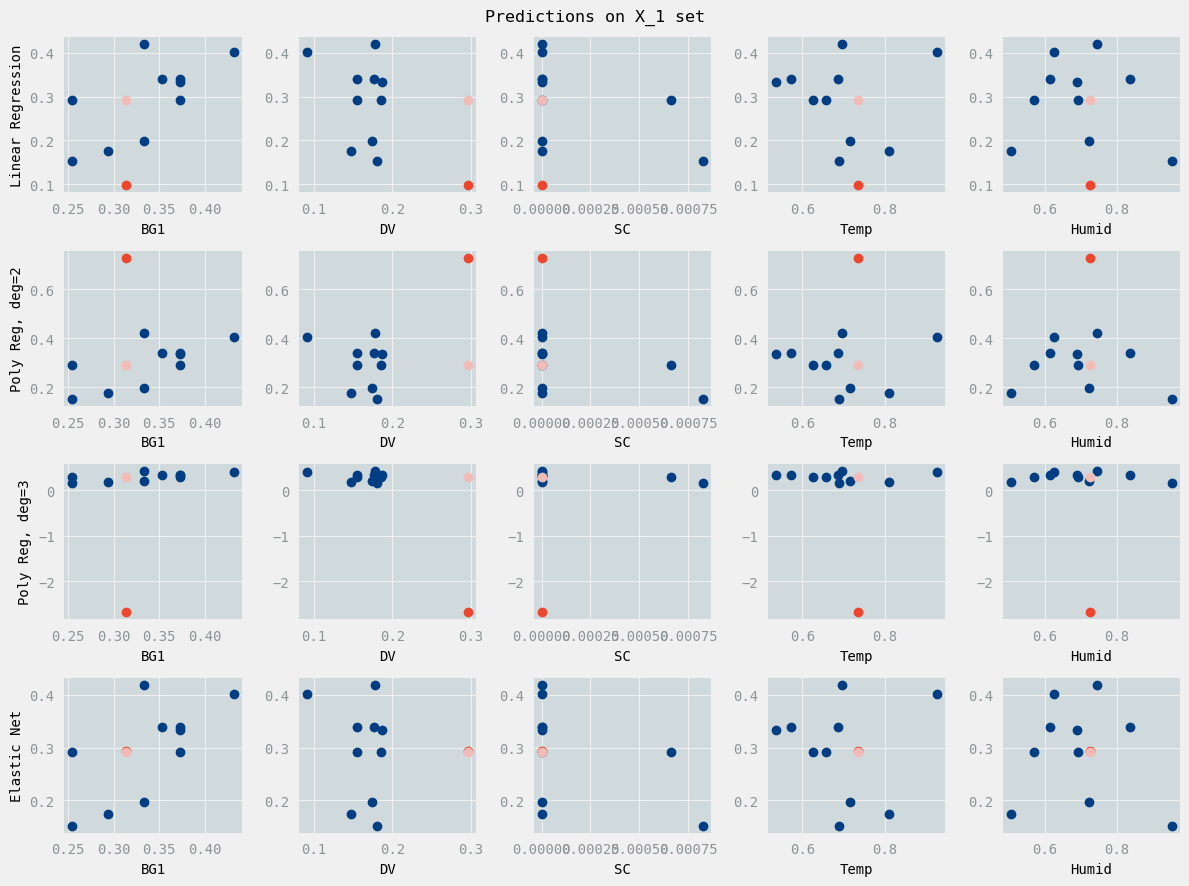

In [89]:
fig1,axes = plt.subplots(nrows=4,ncols=5,figsize=(12,9))

plt.suptitle('Predictions on X_1 set')

#plot Linear Regression predictions vs X_1
axes[0,0].set_ylabel('Linear Regression')
for i,col in enumerate(X_1.columns): 
    axes[0,i].scatter(X_1_train.iloc[:,i],y_1_train,color=blue)
    axes[0,i].scatter(X_1_test.iloc[:,i],test_predictions_1_LR,color=red)
    axes[0,i].scatter(X_1_test.iloc[:,i],y_1_test,color=pink)
    axes[0,i].set_xlabel(col)    
    axes[0,i].grid()
    
#plot Polynomial Regression (degree=2) predictions vs X_1
axes[1,0].set_ylabel('Poly Reg, deg=2')
for i,col in enumerate(X_1.columns): 
    axes[1,i].scatter(X_1_train.iloc[:,i],y_1_train,color=blue)
    axes[1,i].scatter(X_1_test.iloc[:,i],test_predictions_1_PR,color=red)
    axes[1,i].scatter(X_1_test.iloc[:,i],y_1_test,color=pink)
    axes[1,i].set_xlabel(col)    
    axes[1,i].grid()

#plot Polynomial Regression (degree=3) predictions vs X_1
axes[2,0].set_ylabel('Poly Reg, deg=3')
for i,col in enumerate(X_1.columns): 
    axes[2,i].scatter(X_1_train.iloc[:,i],y_1_train,color=blue)
    axes[2,i].scatter(X_1_test.iloc[:,i],test_predictions_1_PR2,color=red)
    axes[2,i].scatter(X_1_test.iloc[:,i],y_1_test,color=pink)
    axes[2,i].set_xlabel(col)    
    axes[2,i].grid()
    
#plot Elastic Net predictions vs X_1
axes[3,0].set_ylabel('Elastic Net')
for i,col in enumerate(X_1.columns): 
    axes[3,i].scatter(X_1_train.iloc[:,i],y_1_train,color=blue)
    axes[3,i].scatter(X_1_test.iloc[:,i],test_predictions_1_EN,color=red)
    axes[3,i].scatter(X_1_test.iloc[:,i],y_1_test,color=pink)
    axes[3,i].set_xlabel(col)    
    axes[3,i].grid()
    
plt.tight_layout();

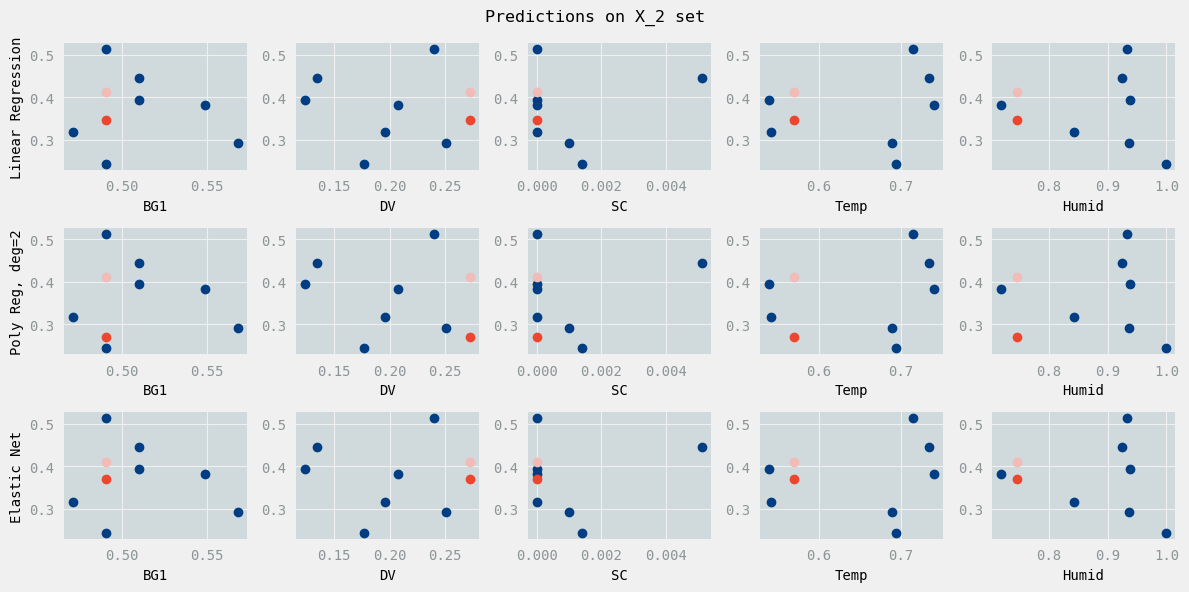

In [91]:
fig2,axes = plt.subplots(nrows=3,ncols=5,figsize=(12,6))

plt.suptitle('Predictions on X_2 set')

#plot Linear Regression predictions vs X_2
axes[0,0].set_ylabel('Linear Regression')
for i,col in enumerate(X_2.columns): 
    axes[0,i].scatter(X_2_train.iloc[:,i],y_2_train,color=blue)
    axes[0,i].scatter(X_2_test.iloc[:,i],test_predictions_2_LR,color=red)
    axes[0,i].scatter(X_2_test.iloc[:,i],y_2_test,color=pink)
    axes[0,i].set_xlabel(col)    
    axes[0,i].grid()
    
#plot Polynomial Regression (degree=2) predictions vs X_2
axes[1,0].set_ylabel('Poly Reg, deg=2')
for i,col in enumerate(X_2.columns): 
    axes[1,i].scatter(X_2_train.iloc[:,i],y_2_train,color=blue)
    axes[1,i].scatter(X_2_test.iloc[:,i],test_predictions_2_PR,color=red)
    axes[1,i].scatter(X_2_test.iloc[:,i],y_2_test,color=pink)
    axes[1,i].set_xlabel(col)    
    axes[1,i].grid()
    
#plot Elastic Net predictions vs X_2
axes[2,0].set_ylabel('Elastic Net')
for i,col in enumerate(X_2.columns): 
    axes[2,i].scatter(X_2_train.iloc[:,i],y_2_train,color=blue)
    axes[2,i].scatter(X_2_test.iloc[:,i],test_predictions_2_EN,color=red)
    axes[2,i].scatter(X_2_test.iloc[:,i],y_2_test,color=pink)
    axes[2,i].set_xlabel(col)    
    axes[2,i].grid()
    
plt.tight_layout();

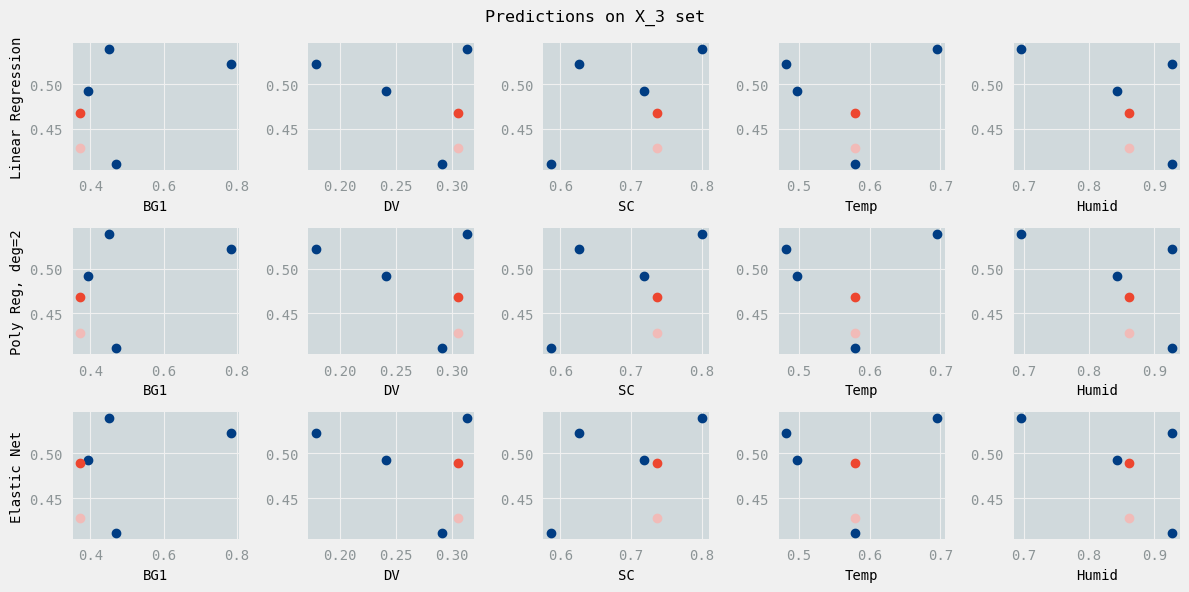

In [92]:
fig3,axes = plt.subplots(nrows=3,ncols=5,figsize=(12,6))

plt.suptitle('Predictions on X_3 set')

#plot Linear Regression predictions vs X_3
axes[0,0].set_ylabel('Linear Regression')
for i,col in enumerate(X_3.columns): 
    axes[0,i].scatter(X_3_train.iloc[:,i],y_3_train,color=blue)
    axes[0,i].scatter(X_3_test.iloc[:,i],test_predictions_3_LR,color=red)
    axes[0,i].scatter(X_3_test.iloc[:,i],y_3_test,color=pink)
    axes[0,i].set_xlabel(col)    
    axes[0,i].grid()
    
#plot Polynomial Regression (degree=2) predictions vs X_3
axes[1,0].set_ylabel('Poly Reg, deg=2')
for i,col in enumerate(X_3.columns): 
    axes[1,i].scatter(X_3_train.iloc[:,i],y_3_train,color=blue)
    axes[1,i].scatter(X_3_test.iloc[:,i],test_predictions_3_PR,color=red)
    axes[1,i].scatter(X_3_test.iloc[:,i],y_3_test,color=pink)
    axes[1,i].set_xlabel(col)    
    axes[1,i].grid()
    
#plot Elastic Net predictions vs X_3
axes[2,0].set_ylabel('Elastic Net')
for i,col in enumerate(X_3.columns): 
    axes[2,i].scatter(X_3_train.iloc[:,i],y_3_train,color=blue)
    axes[2,i].scatter(X_3_test.iloc[:,i],test_predictions_3_EN,color=red)
    axes[2,i].scatter(X_3_test.iloc[:,i],y_3_test,color=pink)
    axes[2,i].set_xlabel(col)    
    axes[2,i].grid()
    
plt.tight_layout();

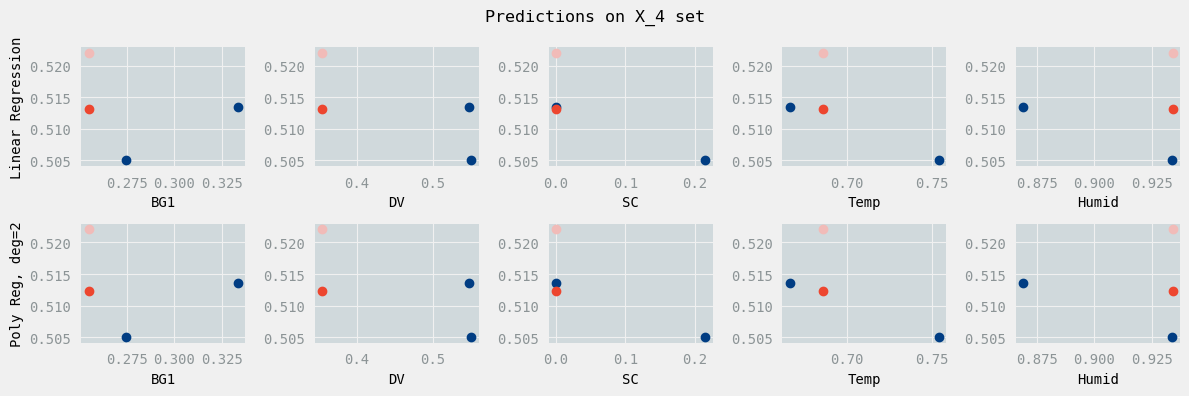

In [93]:
fig4,axes = plt.subplots(nrows=2,ncols=5,figsize=(12,4))

plt.suptitle('Predictions on X_4 set')

#plot Linear Regression predictions vs X_4
axes[0,0].set_ylabel('Linear Regression')
for i,col in enumerate(X_4.columns): 
    axes[0,i].scatter(X_4_train.iloc[:,i],y_4_train,color=blue)
    axes[0,i].scatter(X_4_test.iloc[:,i],test_predictions_4_LR,color=red)
    axes[0,i].scatter(X_4_test.iloc[:,i],y_4_test,color=pink)
    axes[0,i].set_xlabel(col)    
    axes[0,i].grid()
    
#plot Polynomial Regression (degree=2) predictions vs X_4
axes[1,0].set_ylabel('Poly Reg, deg=2')
for i,col in enumerate(X_4.columns): 
    axes[1,i].scatter(X_4_train.iloc[:,i],y_4_train,color=blue)
    axes[1,i].scatter(X_4_test.iloc[:,i],test_predictions_4_PR,color=red)
    axes[1,i].scatter(X_4_test.iloc[:,i],y_4_test,color=pink)
    axes[1,i].set_xlabel(col)    
    axes[1,i].grid()

plt.tight_layout();

The Linear Regression and Polynomial Regression algorithms performed better on the medium and small data sets. Elastic Net algorithm performed better on the larger data sets, but had difficulty executing on the smaller data sets, and required hyperparameter tuning each time. Despite its good performance on larger clusters, Elastic Net was not recommended for the application due to its agile database, which would not allow for additional hyperparameter tuning. The remaining two algorithms were then tested further on small to medium sized clusters (4-6 rows) to compare their performance.

## Comparing Linear Regression and Polynomial Regression

The performance of two algorithms was compared across clusters of varying sizes, ranging from 4 to 6 rows. This was done in order to avoid overfitting, while ensuring that the clusters were not too small or too large. For each cluster, an absolute error was calculated, and the mean absolute error values were then compared.

In [234]:
AE_LR = []
for n in range(4,7):
    clusters = list(np.where(scaled_df.groupby('Cluster').count()['bID']==n)[0])
    for i in clusters:
        scaled_cluster = scaled_df[scaled_df['Cluster']==i]
        X = scaled_cluster[['BG1','DV','SC','Temp','Humid']]
        y = scaled_cluster['Y-shID']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/n, random_state=101)
        model_LR = LinearRegression()
        model_LR.fit(X_train,y_train)
        test_prediction_LR = model_LR.predict(X_test)
        AE_LR.append(abs(test_prediction_LR-y_test.values)) 

In [235]:
np.mean(AE_LR)

0.12803767538560412

In [236]:
AE_PR = []
for n in range(4,7):
    clusters = list(np.where(scaled_df.groupby('Cluster').count()['bID']==n)[0])
    for i in clusters:
        scaled_cluster = scaled_df[scaled_df['Cluster']==i]
        X = scaled_cluster[['BG1','DV','SC','Temp','Humid']]
        y = scaled_cluster['Y-shID']
        polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=1/n, random_state=101)
        model_PR = LinearRegression()
        model_PR.fit(X_train,y_train)
        test_prediction_PR = model_PR.predict(X_test)
        AE_PR.append(abs(test_prediction_PR-y_test.values)) 

In [237]:
np.mean(AE_PR)

0.12229780681946621

## 3. Conclusion

The performance of the Polynomial Regression was slightly better, but not significant enough to justify the extra processing time required for transforming the data into polynomial features. As such, the Linear Regression Algorithm was deemed the most suitable for this project.